In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For constructing DataLoder
from torch.utils.data import DataLoader, Dataset

# For constructing Optimizer
import torch.optim as optim

In [2]:
# The function converts character labels to numeric labels, which facilitates the calculation of cross entropy
def labels_to_id(lables):
    target_id = []
    target_lables = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9']
    for lable in lables:
        target_id.append(target_lables.index(lable))
    return target_id

In [3]:
# Define dataset
class TrainDataset(Dataset):
    def __init__(self, filepath):
        data = pd.read_csv('train.csv')
        lables = data['target']
        self.len = data.shape[0]
        self.x_data = torch.tensor(np.array(data)[:, 1:-1].astype(float))
        self.y_data = labels_to_id(lables)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [4]:
# Prepare dataset
batch_size = 64

train_dataset = TrainDataset('train.csv')
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

In [5]:
# Design Model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(93, 64)
        self.l2 = torch.nn.Linear(64, 32)
        self.l3 = torch.nn.Linear(32, 16)
        self.l4 = torch.nn.Linear(16, 9)
        self.activate = torch.nn.ReLU()
 
    def forward(self, x):
        x = self.activate(self.l1(x))
        x = self.activate(self.l2(x))
        x = self.activate(self.l3(x))
        x = self.l4(x)
        return x
    
model = Net()

In [6]:
# Construct Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [7]:
loss_list = []

In [8]:
# Train
def train(epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs = inputs.float()
        optimizer.zero_grad()
        
        # forward + backward + update
        outputs = model(inputs)
        loss = criterion(outputs, target)
        
        loss_list.append(loss.item())
        
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, running_loss / 300))
            running_loss = 0.0

In [9]:
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)

[1,   300] loss: 1.769
[1,   600] loss: 0.992
[1,   900] loss: 0.804
[2,   300] loss: 0.738
[2,   600] loss: 0.706
[2,   900] loss: 0.691
[3,   300] loss: 0.664
[3,   600] loss: 0.670
[3,   900] loss: 0.658
[4,   300] loss: 0.635
[4,   600] loss: 0.634
[4,   900] loss: 0.634
[5,   300] loss: 0.623
[5,   600] loss: 0.610
[5,   900] loss: 0.606
[6,   300] loss: 0.595
[6,   600] loss: 0.598
[6,   900] loss: 0.594
[7,   300] loss: 0.581
[7,   600] loss: 0.579
[7,   900] loss: 0.587
[8,   300] loss: 0.578
[8,   600] loss: 0.568
[8,   900] loss: 0.573
[9,   300] loss: 0.566
[9,   600] loss: 0.565
[9,   900] loss: 0.561
[10,   300] loss: 0.553
[10,   600] loss: 0.560
[10,   900] loss: 0.558


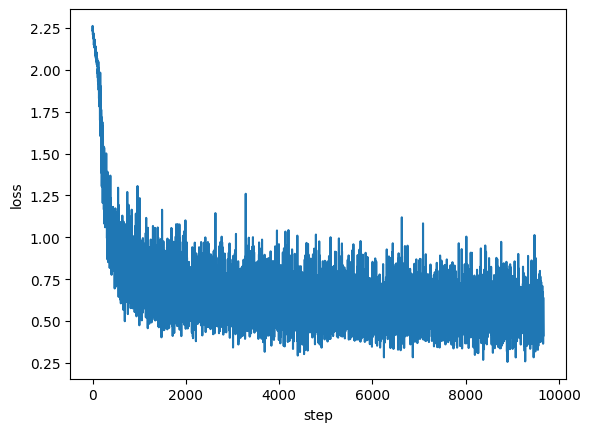

In [11]:
#画损失函数曲线
plt.plot(range(len(loss_list)), loss_list)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()